### Brute Force

A Hamiltonian path (or traceable path) is a path in an undirected or directed graph that visits each vertex exactly once. A Hamiltonian cycle (or Hamiltonian circuit) is a cycle that visits each vertex exactly once. A Hamiltonian path that starts and ends at adjacent vertices can be completed by adding one more edge to form a Hamiltonian cycle and removing any edge from a Hamiltonian cycle produces a Hamiltonian path.
(https://en.wikipedia.org/wiki/Hamiltonian_path)

#### Write a program to
1. Determine whether a given graph has a path from given u to given v or not ($Path(u,v)$). If there is a path, print that path.
2. Check whether a given graph has a Hamiltonian path/cycle. If there is a path/cycle, print that path/cycle.

    **Please note that Information will be provided by various sizes of adjacency Matrix**

---

### Draw graph zone

In [107]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(matrix):
    G = nx.DiGraph()
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            if matrix[i][j] == 1:
                G.add_edge(i, j)
    pos = nx.shell_layout(G)
    plt.figure(figsize=(2,2))  
    nx.draw(G, pos,with_labels=True, node_color='skyblue', node_size=200, font_size=10)
    plt.show()

def draw_solution(matrix, paths, cycles=False):
    """
    Visualize a graph represented by an adjacency matrix and highlight multiple paths (show all paths)
    
    Parameters:
    - matrix (List[List[int]]): Adjacency matrix representing the graph.
                                 An entry of 1 at matrix[i][j] indicates an edge from node i to node j.
    - paths (List[List[int]]): List of paths, where each path is a list of nodes to be highlighted.
    """
    G = nx.DiGraph()
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            if matrix[i][j] == 1:
                G.add_edge(i, j)
    pos = nx.shell_layout(G)
    for path in paths:
        plt.figure(figsize=(2,2)) 
        # Draw the entire graph in a light color
        nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=200, font_size=10, edge_color='lightgray')
        # Highlight the solution path
        edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
        if cycles:  # Check if the first and last nodes are connected
            edges.append((path[-1], path[0]))  # Add the edge to close the cycle
        nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='r', width=2)
        plt.show()

def draw_current_path(matrix, path):
    """
    Visualize a graph represented by an adjacency matrix and highlight a single path.
    
    Parameters:
    - matrix (List[List[int]]): Adjacency matrix representing the graph.
                                 An entry of 1 at matrix[i][j] indicates an edge from node i to node j.
    - path (List[int]): Path of nodes to be highlighted.
    """
    G = nx.DiGraph()
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            if matrix[i][j] == 1:
                G.add_edge(i, j)
    pos = nx.shell_layout(G)
    plt.figure(figsize=(2,2))
    # Draw the entire graph in light colors
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=200, font_size=10, edge_color='lightgray')
    # Highlight the current path
    edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='r', width=2)
    plt.draw()
    plt.pause(1)  # Pause to observe the drawing

----

## CODE

มี 2 เวอร์ชั่น 

version 1
 - เริ่มจากหา trail จาก u ถึง v
 - หา hamiltonian path ก็จะ for loop 2 อัน เพื่อ permutation node ทั้งหมดเก็บไว้
   - แล้วเอาทุก case ที่ได้ไปเช็คว่ามี hamiltonian path ไหม
 - หา hamiltonian cycle ก็จะไปหา hamiltonian path
   - แล้วดูว่ามี edge ตัวสุดท้ายที่เชื่อมกับตัวแรกไหม

version 2
 - เริ่มจากหา trail ที่เป็นไปได้ทั้งโดยเริ่มจาก node ที่กำหนด
 - เวลาหา path จาก u ถึง v ก็แค่ check ว่า case ที่ได้มาจากขั้นที่แล้ว มีตัวสุดท้ายเป็น v ไหม
 - หา hamiltonian path ก็จะหา hamiltonian path โดยเริ่มจากจุดที่กำหนด วนไปจนครบทุก node
   - แล้วเอาไปเช็คเงื่อนไขว่าเป็นไหม ก็จะได้ hamiltonian path ทั้งหมด
 - hamiltonian cycle ก็ทำในทำนองเดียวกัน

 > NOTE: Some Hamiltonian paths are also Hamiltonian cycles
    

#### Find Path given u and v

Version 1

In [108]:
def find_all_paths(matrix, start, end, path=[]):
    path = path + [start]
    # Base case: if the start is same as end, we found a path
    if start == end:
        return [path]
    paths = []  # to store all possible paths
    for i in range(len(matrix[start])):
        # if there's an edge and the node hasn't been visited yet
        if matrix[start][i] == 1 and i not in path:
            newpaths = find_all_paths(matrix, i, end, path)
            for newpath in newpaths:
                paths.append(newpath)
    return paths

Version 2

In [109]:
def generate_all_trails(matrix, node, visited):
    n = len(matrix)
    trails = [[node]]

    for next_node in range(n):
        if matrix[node][next_node] == 1 and next_node not in visited:
            visited.add(next_node)
            for trail in generate_all_trails(matrix, next_node, visited):
                trails.append([node] + trail)
            visited.remove(next_node)
    return trails

def find_all_paths_V2(matrix, start, end):
    visited = set([start])
    all_trails = generate_all_trails(matrix, start, visited)
    valid_paths = [trail for trail in all_trails if trail[-1] == end]
    return valid_paths

#### Hamiltonian paths

Version 1

In [110]:
def find_hamiltonian_paths(matrix):
    n = len(matrix) # Number of nodes
    hamiltonian_paths = []

    # For each pair of nodes, find all paths
    for start in range(n):
        for end in range(n):
            if start != end:
                paths = find_all_paths(matrix, start, end)
                # For each path, check if it's a Hamiltonian path
                for path in paths:
                    if len(path) == n:
                        hamiltonian_paths.append(path)
    return hamiltonian_paths

Version 2

In [111]:
def find_hamiltonian_paths_from_vertex(matrix, start):
    n = len(matrix)
    visited = set([start])
    all_trails = generate_all_trails(matrix, start, visited)

    # Filtering trails to get Hamiltonian paths
    hamiltonian_paths = [trail for trail in all_trails if len(trail) == n]
    
    return hamiltonian_paths

def find_hamiltonian_paths_V2(matrix):
    n = len(matrix)
    all_paths = []
    
    for start_vertex in range(n):
        all_paths.extend(find_hamiltonian_paths_from_vertex(matrix, start_vertex))
    
    return all_paths


#### Hamiltonian cycles

Version 1

In [112]:
def find_hamiltonian_cycles(matrix):
    hamiltonian_paths = find_hamiltonian_paths(matrix)
    hamiltonian_cycles = []

    for path in hamiltonian_paths:
        # Check if start and end nodes of the path are connected
        if matrix[path[0]][path[-1]] == 1:
            hamiltonian_cycles.append(path)
    
    return hamiltonian_cycles

Version 2

In [113]:
def find_hamiltonian_cycles_from_vertex(matrix, start):
    n = len(matrix)
    visited = set([start])
    all_trails = generate_all_trails(matrix, start, visited)

    # Filtering trails to get Hamiltonian paths
    hamiltonian_paths = [trail for trail in all_trails if len(trail) == n]
    # Filtering Hamiltonian paths to get Hamiltonian cycles
    hamiltonian_cycles = [path for path in hamiltonian_paths if matrix[path[-1]][start] == 1]

    return hamiltonian_cycles

def find_hamiltonian_cycles_V2(matrix):
    n = len(matrix)
    all_cycles = []
    
    for start_vertex in range(n):
        all_cycles.extend(find_hamiltonian_cycles_from_vertex(matrix, start_vertex))
    
    return all_cycles

---

### Test program

In [114]:
def read_adjacency_matrix(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        matrix = [list(map(int, line.strip().split())) for line in lines]
    return matrix

# Using the function:
filename = "Example_LAB2.txt"
graph_matrix = read_adjacency_matrix(filename)
print(graph_matrix)


[[0, 1, 0, 0, 0, 1], [1, 0, 1, 0, 0, 0], [0, 1, 0, 1, 0, 0], [0, 0, 1, 0, 1, 0], [0, 0, 0, 1, 0, 1], [1, 0, 0, 0, 1, 0]]


In [115]:
def convert_string_to_matrix(s):
    # Split the string by lines and then split each line by spaces. Convert each element to an integer.
    return [list(map(int, line.split())) for line in s.split('\n')]

# Using the function:
x = """0 1 0 0 0 1
1 0 1 0 0 0
0 1 0 1 0 0
0 0 1 0 1 0
0 0 0 1 0 1
1 0 0 0 1 0"""

graph_matrix = convert_string_to_matrix(x)
print(graph_matrix)


[[0, 1, 0, 0, 0, 1], [1, 0, 1, 0, 0, 0], [0, 1, 0, 1, 0, 0], [0, 0, 1, 0, 1, 0], [0, 0, 0, 1, 0, 1], [1, 0, 0, 0, 1, 0]]


In [116]:
graph_matrix = [
    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1],
    [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1],
    [1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0],
    [1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1],
    [0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1],
    [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0],
    [0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0],
    [0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0],
    [1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1],
    [1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0]
]

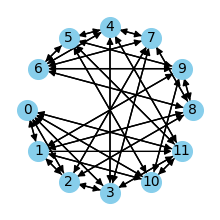

Paths V1: 4151
Paths V2: 4151
Hamiltonian paths V1: 90424
Hamiltonian paths V2: 90424
Hamiltonian cycles V1: 38016
Hamiltonian cycles V2: 38016


In [121]:
print("Compare the two methods permutation:")

pathsV1 = find_all_paths(graph_matrix, 0, 1)
print(f"Paths V1: {len(pathsV1)}")

pathsV2 = find_all_paths_V2(graph_matrix, 0, 1)
print(f"Paths V2: {len(pathsV2)}")

Ham_pathV1 = find_hamiltonian_paths(graph_matrix)
print(f"Hamiltonian paths V1: {len(Ham_pathV1)}")

Ham_pathV2 = find_hamiltonian_paths_V2(graph_matrix)
print(f"Hamiltonian paths V2: {len(Ham_pathV2)}")

Ham_cyclesV1 = find_hamiltonian_cycles(graph_matrix)
print(f"Hamiltonian cycles V1: {len(Ham_cyclesV1)}")

Ham_cyclesV2 = find_hamiltonian_cycles_V2(graph_matrix)
print(f"Hamiltonian cycles V2: {len(Ham_cyclesV2)}")


In [127]:
def canonical_representation(cycle):
    # Rotate to smallest element's position
    min_index = cycle.index(min(cycle))
    rotated_cw = cycle[min_index:] + cycle[:min_index]
    # Counterclockwise rotation
    rotated_ccw = list(reversed(cycle[-min_index:] + cycle[:-min_index]))
    # Return the lexicographically smaller representation (CW or CCW)
    return min(rotated_cw, rotated_ccw)


def filter_unique_cycles(all_cycles):
    unique_cycles_set = set(tuple(canonical_representation(cycle)) for cycle in all_cycles)
    return [list(cycle) for cycle in unique_cycles_set]

def canonical_representation_path(path):
    # Reverse path if its end vertex is smaller than its start vertex
    return min(path, list(reversed(path)))

def filter_unique_paths(all_paths):
    unique_paths_set = set(tuple(canonical_representation_path(path)) for path in all_paths)
    return [list(path) for path in unique_paths_set]


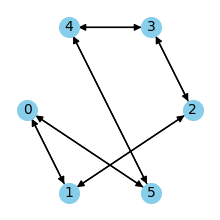

Paths V1: 2 unique paths


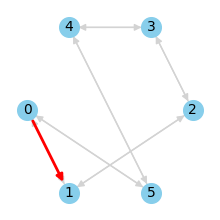

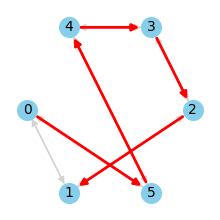

Paths V2: 2 unique paths


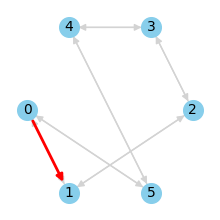

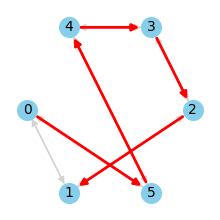

Hamiltonian paths V1: 6 unique paths


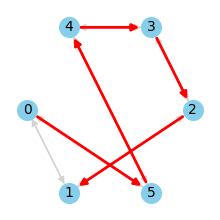

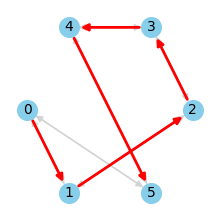

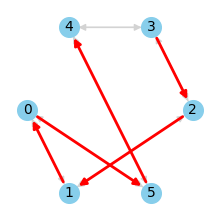

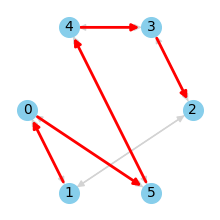

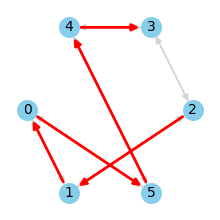

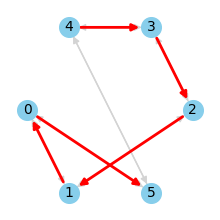

Hamiltonian paths V2: 6 unique paths


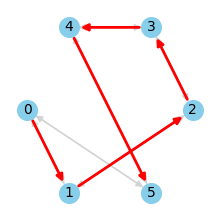

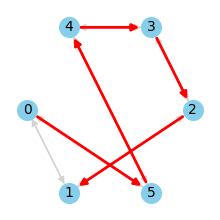

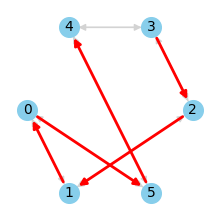

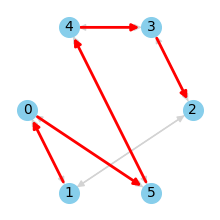

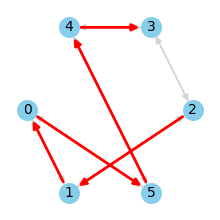

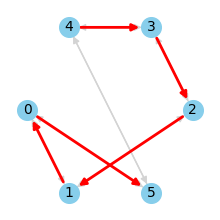

[[0, 5, 4, 3, 2, 1], [0, 1, 2, 3, 4, 5]]
Hamiltonian cycles V1: 2 unique cycles


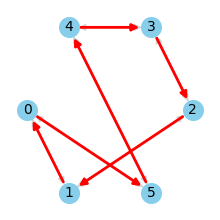

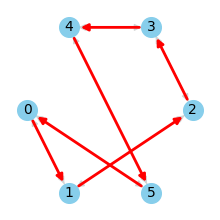

[[0, 1, 2, 3, 4, 5], [0, 5, 4, 3, 2, 1]]
Hamiltonian cycles V2: 2 unique cycles


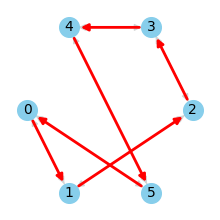

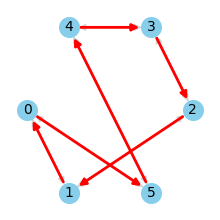

In [130]:
def convert_string_to_matrix(s):
    # Split the string by lines and then split each line by spaces. Convert each element to an integer.
    return [list(map(int, line.split())) for line in s.split('\n')]

# Using the function:
x = """0 1 0 0 0 1
1 0 1 0 0 0
0 1 0 1 0 0
0 0 1 0 1 0
0 0 0 1 0 1
1 0 0 0 1 0"""

graph_matrix = convert_string_to_matrix(x)
draw_graph(graph_matrix)

pathsV1 = find_all_paths(graph_matrix, 0, 1)
pathsV1 = filter_unique_paths(pathsV1)
print(f"Paths V1: {len(pathsV1)} unique paths")
draw_solution(graph_matrix, pathsV1)

pathsV2 = find_all_paths_V2(graph_matrix, 0, 1)
pathsV2 = filter_unique_paths(pathsV2)
print(f"Paths V2: {len(pathsV2)} unique paths")
draw_solution(graph_matrix, pathsV2)

Ham_pathV1 = find_hamiltonian_paths(graph_matrix)
Ham_pathV1 = filter_unique_paths(Ham_pathV1)
print(f"Hamiltonian paths V1: {len(Ham_pathV1)} unique paths")
draw_solution(graph_matrix, Ham_pathV1)

Ham_pathV2 = find_hamiltonian_paths_V2(graph_matrix)
Ham_pathV2 = filter_unique_paths(Ham_pathV2)
print(f"Hamiltonian paths V2: {len(Ham_pathV2)} unique paths")
draw_solution(graph_matrix, Ham_pathV2)

Ham_cyclesV1 = find_hamiltonian_cycles(graph_matrix)
Ham_cyclesV1 = filter_unique_cycles(Ham_cyclesV1)
print(f"Hamiltonian cycles V1: {len(Ham_cyclesV1)} unique cycles")
draw_solution(graph_matrix, Ham_cyclesV1, cycles=True)

Ham_cyclesV2 = find_hamiltonian_cycles_V2(graph_matrix)
Ham_cyclesV2 = filter_unique_cycles(Ham_cyclesV2)
print(f"Hamiltonian cycles V2: {len(Ham_cyclesV2)} unique cycles")
draw_solution(graph_matrix, Ham_cyclesV2, cycles=True)




In [118]:
import time

def measure_avg_time(func, *args, runs=10):
    total_time = 0
    for _ in range(runs):
        start_time = time.time()
        func(*args)
        total_time += (time.time() - start_time)
    return total_time / runs

# Compare find_all_paths V1 vs V2
avg_time = measure_avg_time(find_all_paths, graph_matrix, 0, 1)
print(f"Average execution time for Paths V1: {avg_time} seconds")


avg_time = measure_avg_time(find_all_paths_V2, graph_matrix, 0, 1)
print(f"Average execution time for Paths V2: {avg_time} seconds")

# Compare find_hamiltonian_paths V1 vs V2
avg_time = measure_avg_time(find_hamiltonian_paths, graph_matrix)
print(f"Average execution time for Hamiltonian paths V1: {avg_time} seconds")

avg_time = measure_avg_time(find_hamiltonian_paths_V2, graph_matrix)
print(f"Average execution time for Hamiltonian paths V2: {avg_time} seconds")

# Compare find_hamiltonian_cycles V1 vs V2
avg_time = measure_avg_time(find_hamiltonian_cycles, graph_matrix)
print(f"Average execution time for Hamiltonian cycles V1: {avg_time} seconds")

avg_time = measure_avg_time(find_hamiltonian_cycles_V2, graph_matrix)
print(f"Average execution time for Hamiltonian cycles V2: {avg_time} seconds")


Average execution time for Paths V1: 0.02799370288848877 seconds
Average execution time for Paths V2: 0.4201420068740845 seconds
Average execution time for Hamiltonian paths V1: 4.447027778625488 seconds
Average execution time for Hamiltonian paths V2: 5.008085083961487 seconds
Average execution time for Hamiltonian cycles V1: 4.531018233299255 seconds
Average execution time for Hamiltonian cycles V2: 4.958307218551636 seconds
